### Week_9 - Project: Image Classifier

In [3]:
import os
import cv2
import numpy as np
import pandas as pd

from matplotlib import pyplot as plt
from sklearn.model_selection import train_test_split

import tensorflow as tf
from tensorflow.keras.preprocessing.image import load_img
from tensorflow import keras
from tensorflow.keras import layers

#### 1. Load images

In [7]:
# empty lists to collect X-image arrays, y- corresponding labels
X = []
y = []

# set names of categories (corresponding to folder names)
classes = ['book', 'cutlery', 'face', 'gesture', 'glass', 'mug', 'pen', 'shoe']
# Numeric-   0        1          2        3         4       5       6      7 

dict_classes = {i:target for i, target in enumerate(classes)}

In [8]:
dict_classes

{0: 'book',
 1: 'cutlery',
 2: 'face',
 3: 'gesture',
 4: 'glass',
 5: 'mug',
 6: 'pen',
 7: 'shoe'}

In [9]:
# loop through folders and import images - convert each image to an array, append it to X, append category number to y
for i, target in enumerate(classes):
    files = os.listdir(f'images/{target}')
    for file in files:
        image = load_img(f'images/{target}/{file}')
        image_array = np.array(image)
        X.append(image_array)
        y.append(i)

In [10]:
len(X), len(y)

(721, 721)

In [11]:
# turn lists into arrays
X = np.array(X)
y = np.array(y)

In [12]:
X.shape, y.shape

((721, 224, 224, 3), (721,))

In [13]:
# shuffle the data
shuffler = np.random.permutation(len(X))
X = X[shuffler]
y = y[shuffler]

#### 2. Compile model

In [14]:
# Model / data parameters
num_classes = 8
input_shape = (224, 224, 3)

In [15]:
# train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30)

In [16]:
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((504, 224, 224, 3), (217, 224, 224, 3), (504,), (217,))

In [17]:
# Scale images
X_train_scaled = X_train.astype("float32")/255
X_test_scaled = X_test.astype("float32")/255


In [18]:
# one hot encoding (labels)
y_train_ohe = keras.utils.to_categorical(y_train, num_classes)
y_test_ohe = keras.utils.to_categorical(y_test, num_classes)

In [19]:
# 3 Convulutional layers with Max pooling (32,32,64) --> flatten, dropout (0.5), output (8)
model = keras.Sequential(
    [
        keras.Input(shape=input_shape),
        layers.Conv2D(32, kernel_size=(3, 3), activation="relu"),
        layers.MaxPooling2D(pool_size=(2, 2)),
        layers.Conv2D(32, kernel_size=(3, 3), activation="relu"),
        layers.MaxPooling2D(pool_size=(2, 2)),
        layers.Conv2D(64, kernel_size=(3, 3), activation="relu"),
        layers.MaxPooling2D(pool_size=(2, 2)),
        layers.Flatten(),
        layers.Dropout(0.5),
        layers.Dense(num_classes, activation="softmax"),
    ]
)

In [16]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 222, 222, 32)      896       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 111, 111, 32)      0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 109, 109, 32)      9248      
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 54, 54, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 52, 52, 64)        18496     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 26, 26, 64)        0         
_________________________________________________________________
flatten (Flatten)            (None, 43264)             0

#### 3. train the Model

In [17]:
batch_size = 128
epochs = 100

In [18]:
# set Evaluation metric
model.compile(loss="categorical_crossentropy", optimizer="adam", metrics=["accuracy"])

In [19]:
#  Early stopping:
early_stop = keras.callbacks.EarlyStopping(
    monitor='val_loss',
    min_delta=0.0005,
    patience=3,
    verbose=1,
    restore_best_weights=True
)

In [236]:
#hist = model.fit(X_train_scaled, y_train_ohe,
#                 batch_size=batch_size,
#                 epochs=epochs,
#                 validation_split=0.1,
#                 callbacks = [early_stop])

Epoch 1/100
4/4 [==============================] - 18s 4s/step - loss: 2.1766 - accuracy: 0.1369 - val_loss: 1.9868 - val_accuracy: 0.1373
Epoch 2/100
4/4 [==============================] - 15s 4s/step - loss: 1.8774 - accuracy: 0.2671 - val_loss: 1.7187 - val_accuracy: 0.3333
Epoch 3/100
4/4 [==============================] - 15s 3s/step - loss: 1.5633 - accuracy: 0.3907 - val_loss: 1.4230 - val_accuracy: 0.5686
Epoch 4/100
4/4 [==============================] - 14s 3s/step - loss: 1.1484 - accuracy: 0.6932 - val_loss: 1.0537 - val_accuracy: 0.6078
Epoch 5/100
4/4 [==============================] - 14s 3s/step - loss: 0.8130 - accuracy: 0.7881 - val_loss: 0.8275 - val_accuracy: 0.6471
Epoch 6/100
4/4 [==============================] - 13s 3s/step - loss: 0.7249 - accuracy: 0.7461 - val_loss: 1.1904 - val_accuracy: 0.6078
Epoch 7/100
4/4 [==============================] - 13s 3s/step - loss: 0.7488 - accuracy: 0.7483 - val_loss: 0.7202 - val_accuracy: 0.7255
Epoch 8/100
4/4 [==========

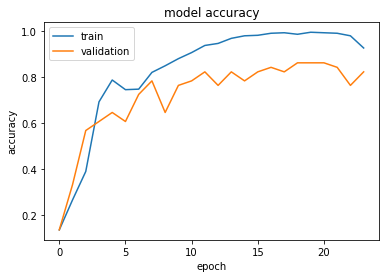

In [237]:
# summarize history for accuracy
plt.plot(hist.history['accuracy'])
plt.plot(hist.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()

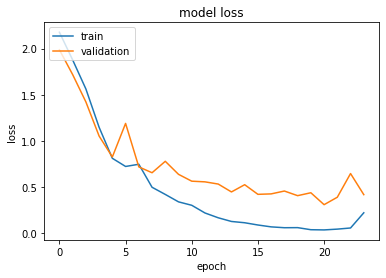

In [238]:
# summarize history for loss
plt.plot(hist.history['loss'])
plt.plot(hist.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()

In [239]:
# evaluate model - Test
score = model.evaluate(X_test_scaled, y_test_ohe, verbose=0)
print("Test loss:", score[0])
print("Test accuracy:", score[1])

Test loss: 0.4291440546512604
Test accuracy: 0.9078341126441956


In [240]:
# model.save("model_imageclassifier323264.h5")

In [164]:
dict_classes

{0: 'book',
 1: 'cutlery',
 2: 'face',
 3: 'gesture',
 4: 'glass',
 5: 'mug',
 6: 'pen',
 7: 'shoe'}

#### 4. Make predictions

##### make one prediction

In [4]:
from tensorflow.keras.models import load_model

# load pre-traind : model 3
model_pre = load_model("model_imageclassifier323264.h5")

In [5]:
# X_test (217 images)
i = 84

(<matplotlib.image.AxesImage at 0x260d7243940>, 'shoe')

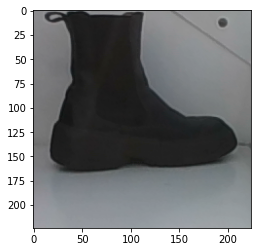

In [20]:
plt.imshow(X_test_scaled[i]), dict_classes[y_test[i]]

In [21]:
dict_classes[np.argmax(model_pre.predict(X_test_scaled[i].reshape(-1, 224, 224, 3)))]

'shoe'

##### make predictions for Test set

In [22]:
predictions = []
y_true = y_test

In [23]:
for i in range(len(X_test_scaled)):
    y_ohe = model_pre.predict(X_test_scaled[i].reshape(-1, 224, 224, 3))
    y_pred = np.argmax(y_ohe)
    predictions.append(y_pred)


In [24]:
len(predictions), len(y_true)

(217, 217)

In [25]:
pred_array = np.array(predictions)

In [26]:
type(pred_array), type(y_true)

(numpy.ndarray, numpy.ndarray)

##### plot Confusion Matrix

In [27]:
from sklearn.metrics import confusion_matrix
import pylab as pl
import seaborn as sns
import matplotlib.pyplot as plt

In [28]:
cm = confusion_matrix(y_true, pred_array)

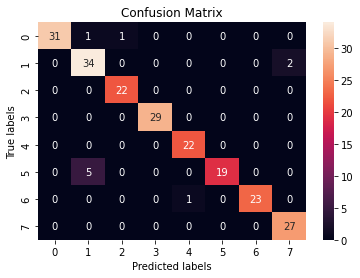

In [29]:
ax= plt.subplot()
sns.heatmap(cm, annot=True, fmt='g', ax=ax);
ax.set_xlabel('Predicted labels');ax.set_ylabel('True labels'); 
ax.set_title('Confusion Matrix'); 

In [30]:
dict_classes

{0: 'book',
 1: 'cutlery',
 2: 'face',
 3: 'gesture',
 4: 'glass',
 5: 'mug',
 6: 'pen',
 7: 'shoe'}

#### 5. See what model learned (LIME)

In [31]:
from lime import lime_image
explainer = lime_image.LimeImageExplainer()

##### example 1

In [103]:
n = 111

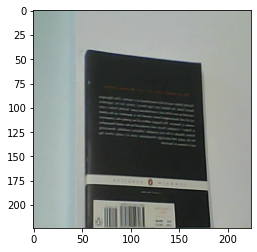

In [104]:
# test file = 217
plt.imshow(X_test_scaled[n])

In [105]:
dict_classes[np.argmax(model_pre.predict(X_test_scaled[n].reshape(-1, 224, 224, 3)))]

'book'

In [106]:
model_pre.predict(X_test_scaled[n].reshape(-1, 224, 224, 3))

array([[9.9975473e-01, 4.0839336e-09, 1.9599174e-18, 2.0879666e-13,
        4.4886785e-24, 2.6755738e-06, 1.5208790e-13, 2.4262538e-04]],
      dtype=float32)

In [109]:
explanation = explainer.explain_instance(X_test[n], model_pre.predict)

100%|██████████| 1000/1000 [00:23<00:00, 42.49it/s]


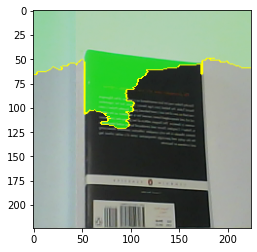

In [110]:
from skimage.segmentation import mark_boundaries
temp, mask = explanation.get_image_and_mask(explanation.top_labels[0],\
                            positive_only=False, num_features=10, hide_rest=False)

plt.imshow(mark_boundaries(temp, mask))

##### example 2

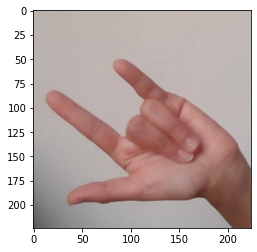

In [111]:
plt.imshow(X_test_scaled[8])

In [112]:
dict_classes[np.argmax(model_pre.predict(X_test_scaled[8].reshape(-1, 224, 224, 3)))]

'gesture'

In [113]:
model_pre.predict(X_test_scaled[8].reshape(-1, 224, 224, 3))

array([[3.0498892e-08, 9.2149904e-08, 2.5044206e-11, 9.9999511e-01,
        2.7502833e-12, 4.8440256e-06, 4.8763638e-10, 5.2765852e-08]],
      dtype=float32)

In [114]:
explanation2 = explainer.explain_instance(X_test[8], model_pre.predict)

100%|██████████| 1000/1000 [00:21<00:00, 47.35it/s]


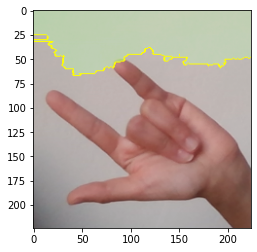

In [143]:
from skimage.segmentation import mark_boundaries
temp, mask = explanation2.get_image_and_mask(explanation2.top_labels[0],\
                            positive_only=False, num_features=10, hide_rest=False)

plt.imshow(mark_boundaries(temp, mask))

##### example 3

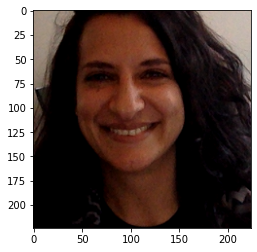

In [139]:
plt.imshow(X_test_scaled[32])

In [145]:
dict_classes[np.argmax(model_pre.predict(X_test_scaled[32].reshape(-1, 224, 224, 3)))]

'face'

In [146]:
model_pre.predict(X_test_scaled[32].reshape(-1, 224, 224, 3))

array([[5.5727313e-20, 9.8606426e-15, 1.0000000e+00, 2.3819716e-13,
        0.0000000e+00, 9.6393694e-19, 6.3001847e-17, 2.3230714e-18]],
      dtype=float32)

In [147]:
explanation3 = explainer.explain_instance(X_test[32], model_pre.predict)

100%|██████████| 1000/1000 [00:21<00:00, 46.56it/s]


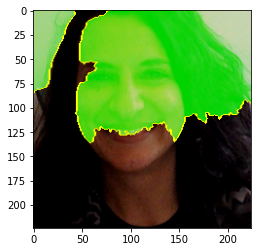

In [148]:
from skimage.segmentation import mark_boundaries
temp, mask = explanation3.get_image_and_mask(explanation3.top_labels[0],\
                            positive_only=False, num_features=10, hide_rest=False)

plt.imshow(mark_boundaries(temp, mask))